In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
font = {
    "family":"SimHei",
    'size':20
}
plt.rc('font',**font)

In [3]:
df = pd.read_csv(open('KMeans.csv',encoding='utf-8'))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# 查看数据是否有空值
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# 查看数据描述
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# 把列改成中文
df.columns = ['用户ID','性别','年龄','年收入','支出']
df.head()

,用户ID,性别,年龄,年收入,支出
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 查看数据分布

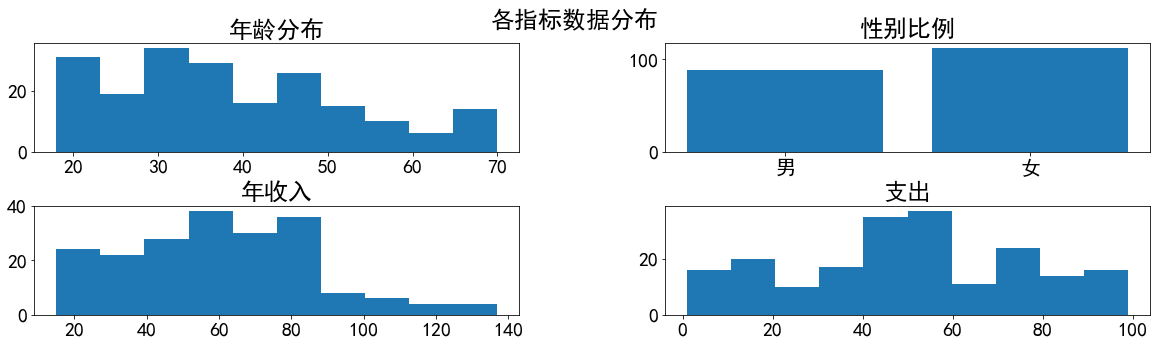

In [8]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('各指标数据分布')

# 画第一个图
ax1 = fig.add_subplot(221)
# 查看年龄分布
ax1.hist(df['年龄'])
ax1.title.set_text('年龄分布')

# 第二个查看性别比例
ax2 = fig.add_subplot(222)
height = [(df['性别']=='Male').sum(), (df['性别']=='Female').sum()]
ax2.bar(['男','女'],height=height)
ax2.title.set_text('性别比例')

# 第三个查看年收入
ax1 = fig.add_subplot(223)
# 查看年收入分布
ax1.hist(df['年收入'])
ax1.title.set_text('年收入')


#  查看支出
ax1 = fig.add_subplot(224)
# 查看支出分布
ax1.hist(df['支出'])
ax1.title.set_text('支出')

fig.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

# 年龄与年收入之间的关系

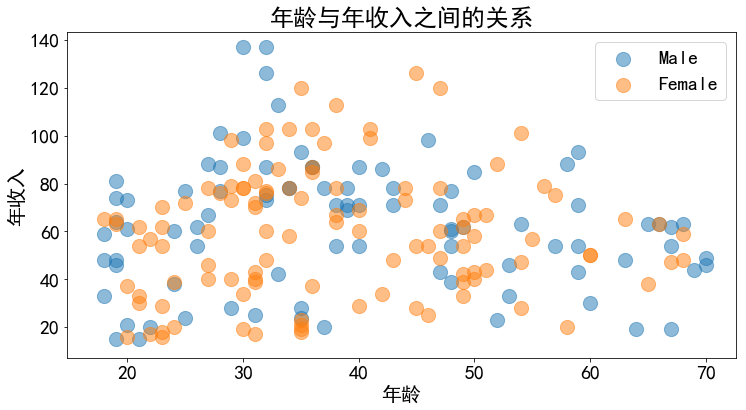

In [10]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年龄',y='年收入'
                ,data=df[df['性别']==gender]
                ,s=200,alpha=0.5,label=gender)
plt.xlabel('年龄')
plt.ylabel('年收入')
plt.title('年龄与年收入之间的关系')
plt.legend()
plt.show()

In [12]:
df['性别']

0        Male
1        Male
2      Female
3      Female
4      Female
5      Female
6      Female
7      Female
8        Male
9      Female
10       Male
11     Female
12     Female
13     Female
14       Male
15       Male
16     Female
17       Male
18       Male
19     Female
20       Male
21       Male
22     Female
23       Male
24     Female
25       Male
26     Female
27       Male
28     Female
29     Female
        ...  
170      Male
171      Male
172      Male
173      Male
174    Female
175    Female
176      Male
177      Male
178      Male
179      Male
180    Female
181    Female
182      Male
183    Female
184    Female
185      Male
186    Female
187      Male
188    Female
189    Female
190    Female
191    Female
192      Male
193    Female
194    Female
195    Female
196    Female
197      Male
198      Male
199      Male
Name: 性别, Length: 200, dtype: object

# 年龄与支出之间的关系

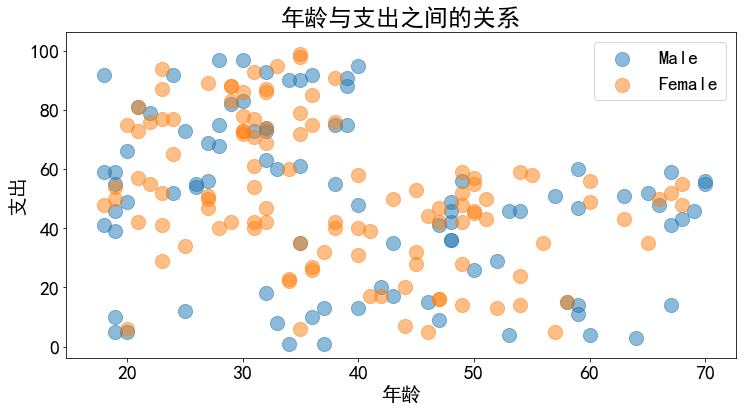

In [16]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年龄',y='支出'
                ,data=df[df['性别']==gender]
                ,s=200,alpha=0.5,label=gender)
plt.xlabel('年龄')
plt.ylabel('支出')
plt.title('年龄与支出之间的关系')
plt.legend()
plt.show()

## 年收入与支出之间的关系

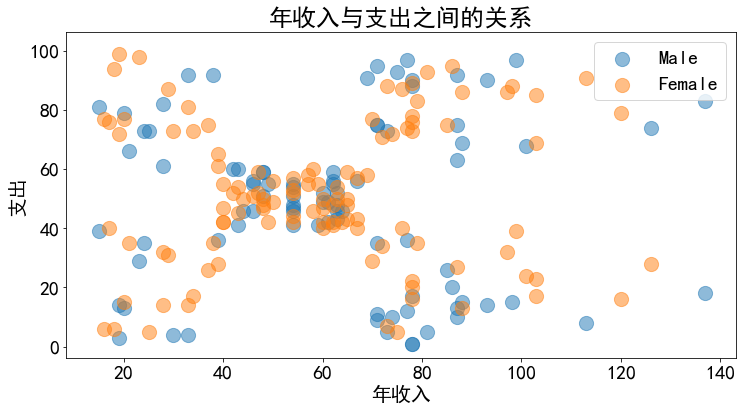

In [15]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年收入',y='支出'
                ,data=df[df['性别']==gender]
                ,s=200,alpha=0.5,label=gender)
plt.xlabel('年收入')
plt.ylabel('支出')
plt.title('年收入与支出之间的关系')
plt.legend()
plt.show()

# 使用kmeans聚类进行分析

In [20]:
x1 = df[['年龄','支出']].values
x1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [21]:
# 寻找最佳k值

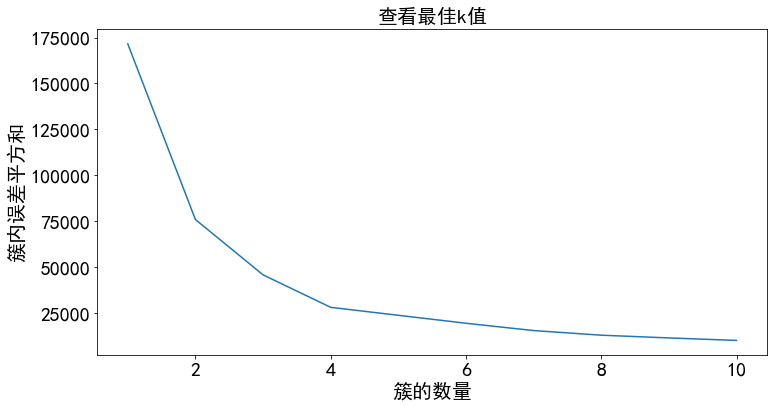

In [22]:
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x1)
    inertia.append(km.inertia_) # 簇内误差平方和
plt.figure(1,figsize=(12,6))
plt.plot(range(1,11), inertia)
plt.title('查看最佳k值',fontsize=20)
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

In [23]:
## 经过上图的观察，我们把k值取为4

In [24]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(x1)

In [25]:
y_means

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [26]:
plt.figure(1, figsize=(12,6))
plt.scatter(x1[y_means==0,0], x1[y_means==0,1], s= 200,c='salmon')
plt.scatter(x1[y_means==1,0], x1[y_means==1,1], s= 200,c='yellowgreen')
plt.scatter(x1[y_means==2,0], x1[y_means==2,1], s= 200,c='cornflowerblue')
plt.scatter(x1[y_means==3,0], x1[y_means==3,1], s= 200,c='magenta')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='中心点')

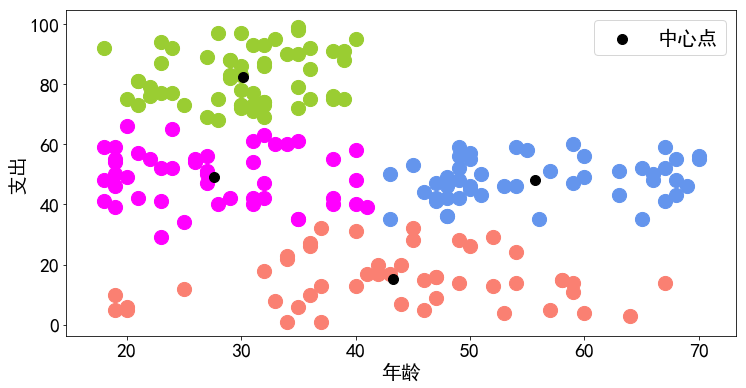

In [27]:
plt.ylabel('支出')
plt.xlabel('年龄')
plt.legend()
plt.show()

# 根据年收入和消费进行分析

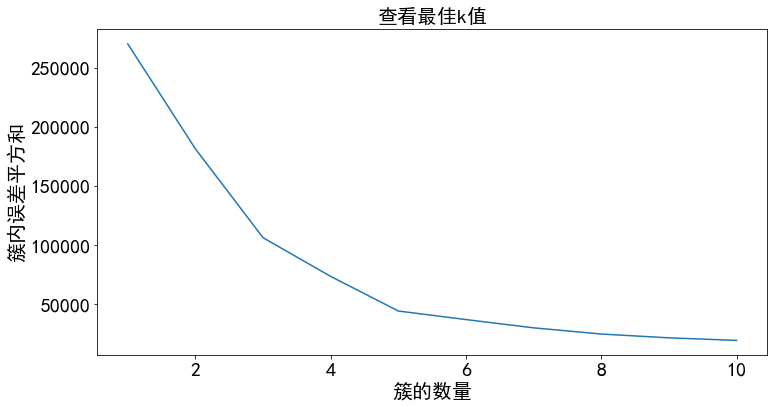

In [28]:
x2 = df[['年收入','支出']].values
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x2)
    inertia.append(km.inertia_) # 簇内误差平方和
plt.figure(1,figsize=(12,6))
plt.plot(range(1,11), inertia)
plt.title('查看最佳k值',fontsize=20)
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

In [29]:
## 经过上图的观察，我们把k值取为5

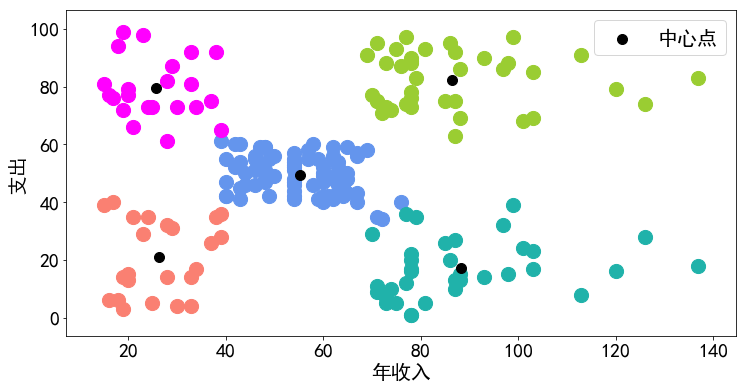

In [30]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(x2)

plt.figure(1, figsize=(12,6))
plt.scatter(x2[y_means==0,0], x2[y_means==0,1], s= 200,c='salmon')
plt.scatter(x2[y_means==1,0], x2[y_means==1,1], s= 200,c='yellowgreen')
plt.scatter(x2[y_means==2,0], x2[y_means==2,1], s= 200,c='cornflowerblue')
plt.scatter(x2[y_means==3,0], x2[y_means==3,1], s= 200,c='magenta')
plt.scatter(x2[y_means==4,0], x2[y_means==4,1], s= 200,c='LightSeaGreen')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='中心点')

plt.ylabel('支出')
plt.xlabel('年收入')
plt.legend()
plt.show()